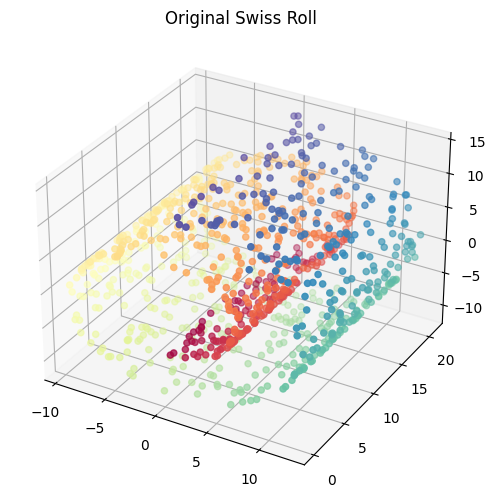

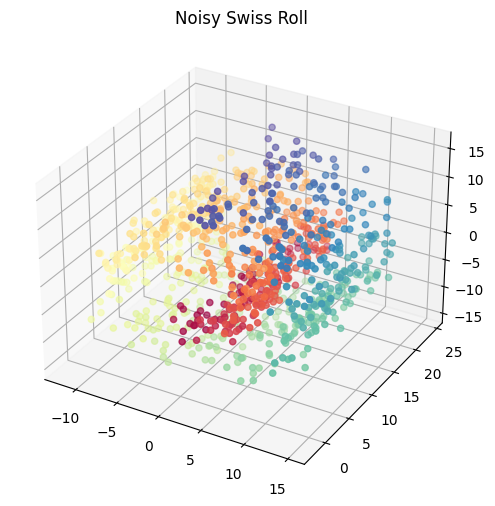

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import pairwise_distances
import warnings
from kisomap_latest import KIsomap
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE, SpectralEmbedding
import umap.umap_ as umap

# To avoid unnecessary warning messages
warnings.simplefilter(action='ignore')

# Gerando o conjunto de dados Swiss Roll
n_samples = 1000
X, color = make_swiss_roll(n_samples, noise=0.0)

# Adicionando ruído ao conjunto de dados Swiss Roll
noise_level = 0.05 * (np.max(X[:, 0]) - np.min(X[:, 0]))
X_noisy = X + noise_level * np.random.randn(*X.shape)

# Função para plotar o Swiss Roll
def plot_swiss_roll(X, color, title):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.set_title(title)
    plt.show()

# Plotando o Swiss Roll original e com ruído
plot_swiss_roll(X, color, "Original Swiss Roll")
plot_swiss_roll(X_noisy, color, "Noisy Swiss Roll")


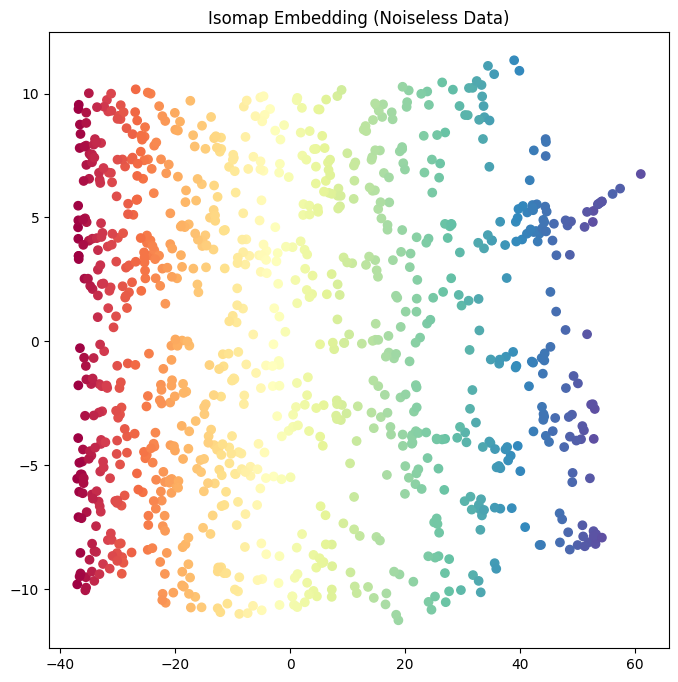

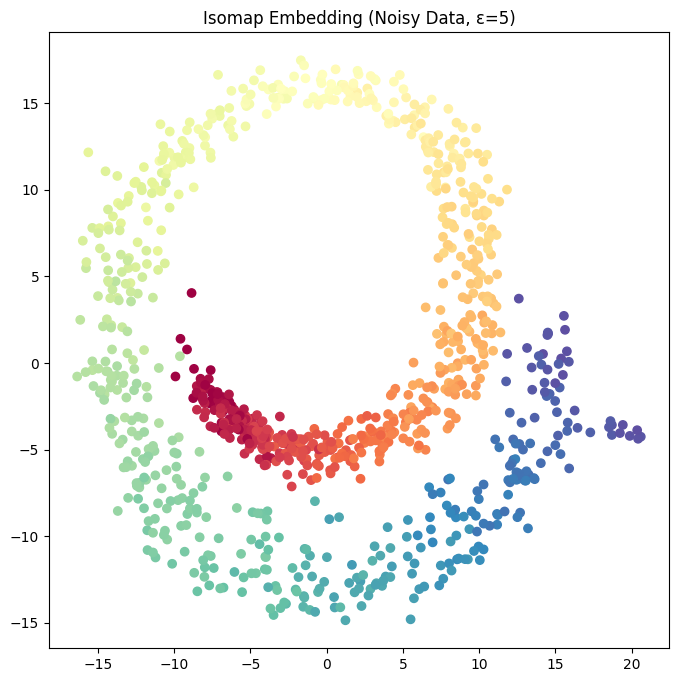

In [17]:
# Função para plotar o embedding do Isomap
def plot_isomap_embedding(X, radius, n_neighbors,title):
    isomap = Isomap(radius=radius, n_neighbors=None)
    X_transformed = isomap.fit_transform(X)
    plt.figure(figsize=(8, 8))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()

# Plotando os embeddings do Isomap
plot_isomap_embedding(X, radius=3.5, n_neighbors=None, title="Isomap Embedding (Noiseless Data)")
plot_isomap_embedding(X_noisy, radius=4, n_neighbors=None, title="Isomap Embedding (Noisy Data, ε=5)")


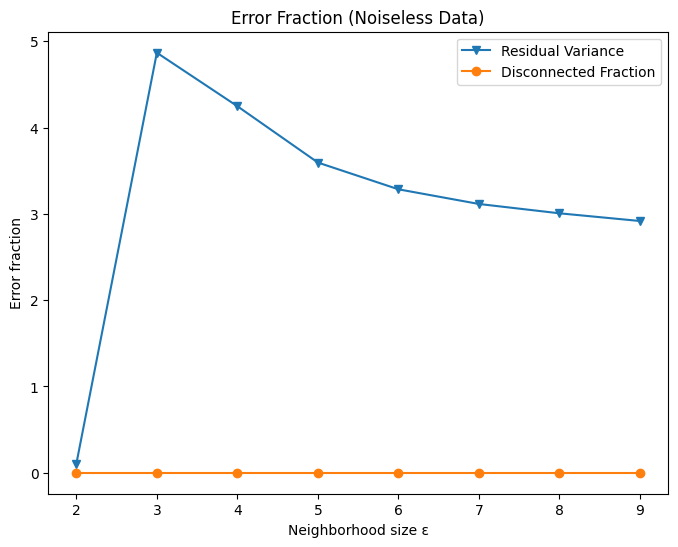

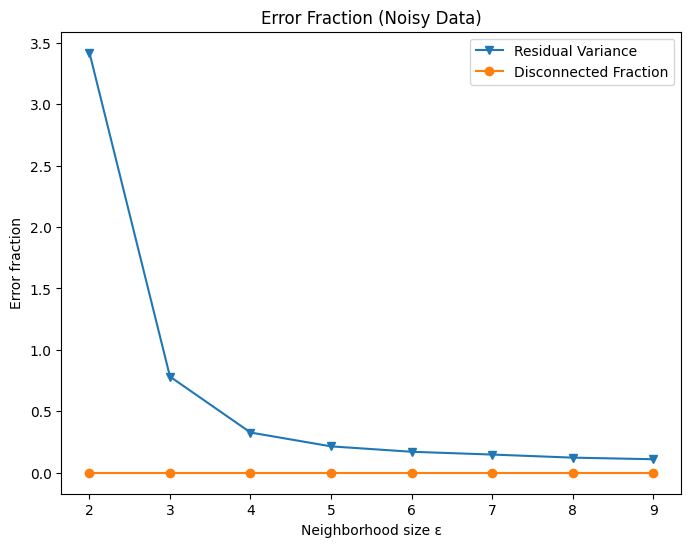

In [19]:
# Função para calcular a variância residual e a fração de pontos não incluídos
def compute_residual_variance_and_disconnected_fraction(X, max_neighbors=10):
    residual_variances = []
    disconnected_fractions = []
    for n_neighbors in range(2, max_neighbors):
        isomap = Isomap(n_neighbors=n_neighbors, n_components=2)
        X_transformed = isomap.fit_transform(X)
        distances = pairwise_distances(X)
        geodesic_distances = pairwise_distances(X_transformed)
        residual_variance = np.sum((distances - geodesic_distances) ** 2) / np.sum(distances ** 2)
        residual_variances.append(residual_variance)
        disconnected_fraction = np.mean(np.isinf(isomap.dist_matrix_))
        disconnected_fractions.append(disconnected_fraction)
    return residual_variances, disconnected_fractions

# Calculando para os dados originais
residual_variances, disconnected_fractions = compute_residual_variance_and_disconnected_fraction(X, max_neighbors=10)

# Plotando os gráficos de fração de erro
def plot_error_fraction(residual_variances, disconnected_fractions, title):
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 2 + len(residual_variances)), residual_variances, 'v-', label='Residual Variance')
    plt.plot(range(2, 2 + len(disconnected_fractions)), disconnected_fractions, 'o-', label='Disconnected Fraction')
    plt.xlabel('Neighborhood size ε')
    plt.ylabel('Error fraction')
    plt.title(title)
    plt.legend()
    plt.show()

plot_error_fraction(residual_variances, disconnected_fractions, "Error Fraction (Noiseless Data)")

# Calculando para os dados com ruído
residual_variances_noisy, disconnected_fractions_noisy = compute_residual_variance_and_disconnected_fraction(X_noisy, max_neighbors=10)
plot_error_fraction(residual_variances_noisy, disconnected_fractions_noisy, "Error Fraction (Noisy Data)")


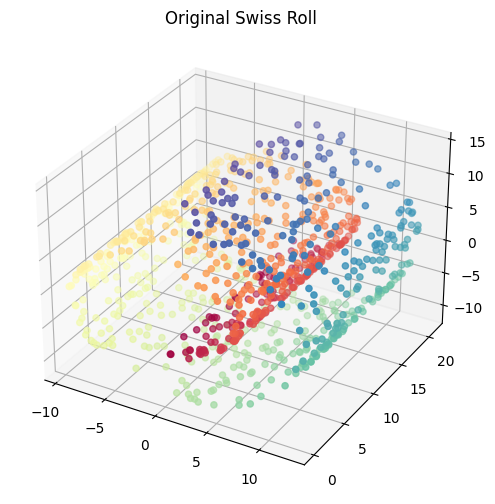

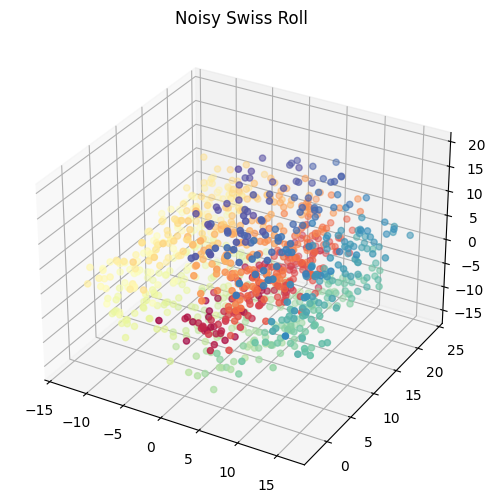

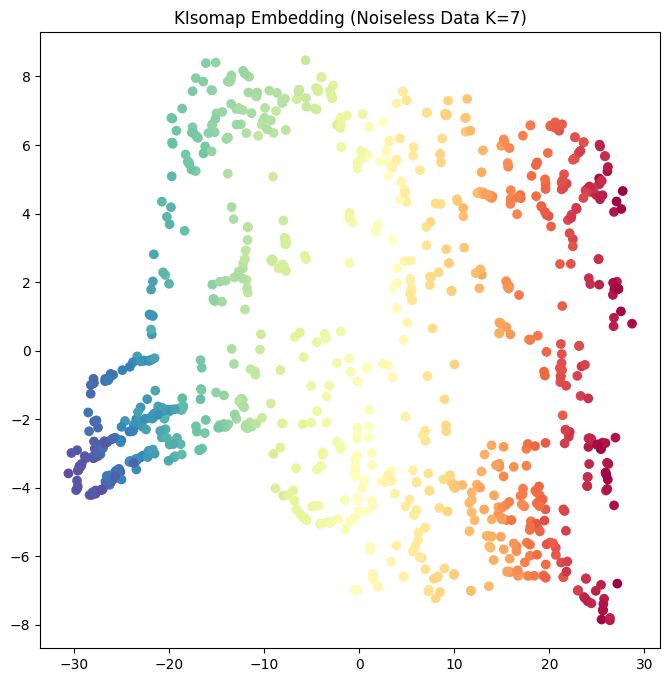

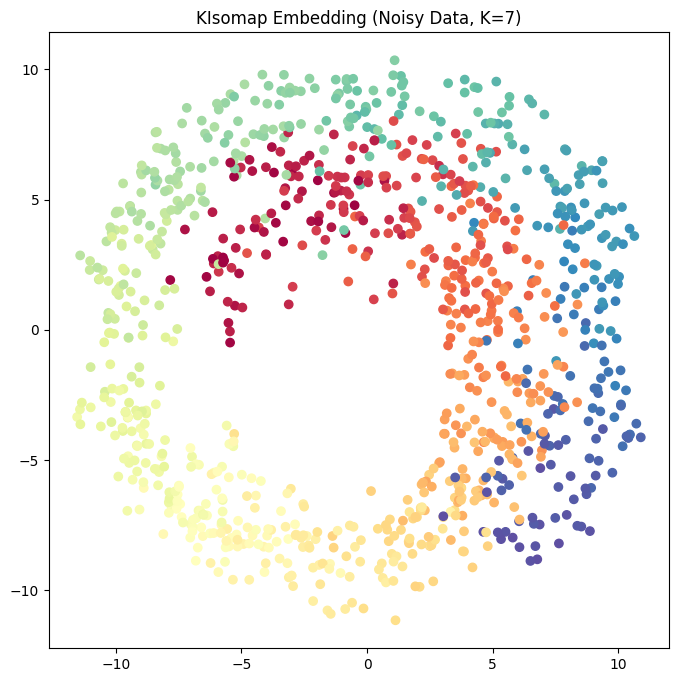

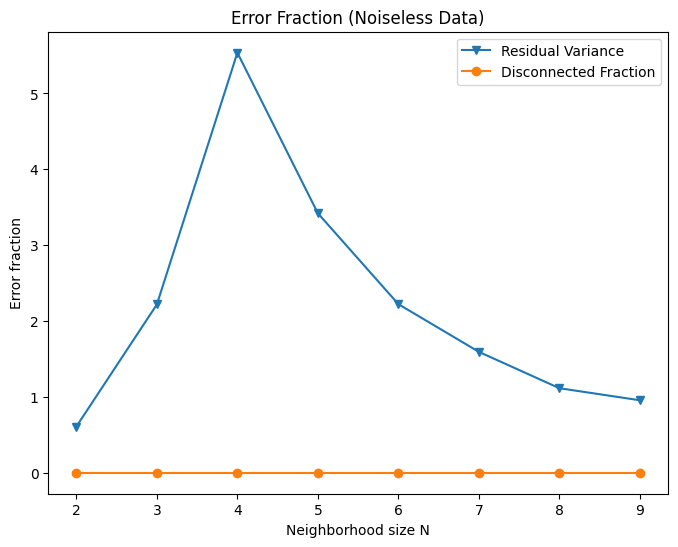

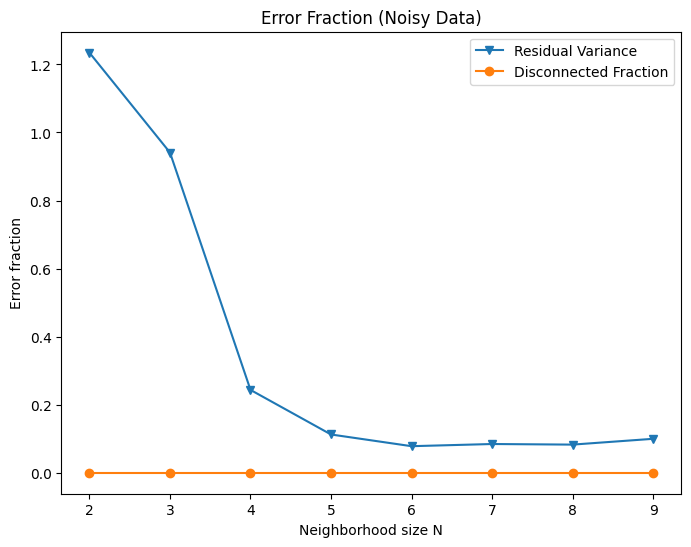

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import pairwise_distances

# Gerando o conjunto de dados Swiss Roll
n_samples = 1000
X, color = make_swiss_roll(n_samples, noise=0.0)

# Adicionando ruído ao conjunto de dados Swiss Roll
noise_level = 0.075 * (np.max(X[:, 0]) - np.min(X[:, 0]))
X_noisy = X + noise_level * np.random.randn(*X.shape)

# Função para plotar o Swiss Roll
def plot_swiss_roll(X, color, title):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.set_title(title)
    plt.show()

# Plotando o Swiss Roll original e com ruído
plot_swiss_roll(X, color, "Original Swiss Roll")
plot_swiss_roll(X_noisy, color, "Noisy Swiss Roll")

# Função para plotar o embedding do Isomap
def plot_isomap_embedding(X, radius, title):
    isomap = Isomap(n_neighbors=None, radius=radius, n_components=2)
    X_transformed = KIsomap(X, 10, 2, 0)
    plt.figure(figsize=(8, 8))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()

# Plotando os embeddings do Isomap
plot_isomap_embedding(X, radius=3.5, title="KIsomap Embedding (Noiseless Data K=7)")
plot_isomap_embedding(X_noisy, radius=4, title="KIsomap Embedding (Noisy Data, K=7)")


# Função para calcular a variância residual e a fração de pontos não incluídos
def compute_residual_variance_and_disconnected_fraction(X, max_neighbors=15):
    residual_variances = []
    disconnected_fractions = []
    for n_neighbors in range(2, max_neighbors):
        isomap = Isomap(n_neighbors=n_neighbors, n_components=2)
        X_transformed = KIsomap(X, n_neighbors, 2, 0)
        
        # Calculando as distâncias geodésicas no espaço original
        distances_original = pairwise_distances(X)
        
        # Calculando as distâncias no espaço de baixa dimensão
        distances_transformed = pairwise_distances(X_transformed)
        
        # Variância residual
        residual_variance = np.sum((distances_original - distances_transformed) ** 2) / np.sum(distances_original ** 2)
        residual_variances.append(residual_variance)
        
        # Fração de pontos desconectados
        disconnected_fraction = np.mean(np.isinf(distances_transformed))
        disconnected_fractions.append(disconnected_fraction)
        
    return residual_variances, disconnected_fractions

# Calculando para os dados originais
residual_variances, disconnected_fractions = compute_residual_variance_and_disconnected_fraction(X, max_neighbors=10)

# Plotando os gráficos de fração de erro
def plot_error_fraction(residual_variances, disconnected_fractions, title):
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 2 + len(residual_variances)), residual_variances, 'v-', label='Residual Variance')
    plt.plot(range(2, 2 + len(disconnected_fractions)), disconnected_fractions, 'o-', label='Disconnected Fraction')
    plt.xlabel('Neighborhood size N')
    plt.ylabel('Error fraction')
    plt.title(title)
    plt.legend()
    plt.show()

plot_error_fraction(residual_variances, disconnected_fractions, "Error Fraction (Noiseless Data)")

# Calculando para os dados com ruído
residual_variances_noisy, disconnected_fractions_noisy = compute_residual_variance_and_disconnected_fraction(X_noisy, max_neighbors=10)
plot_error_fraction(residual_variances_noisy, disconnected_fractions_noisy, "Error Fraction (Noisy Data)")


# Fazer um gráfico n_samples vs. tempo de cada RD

# Gráfico numbero de vizinhos vs 

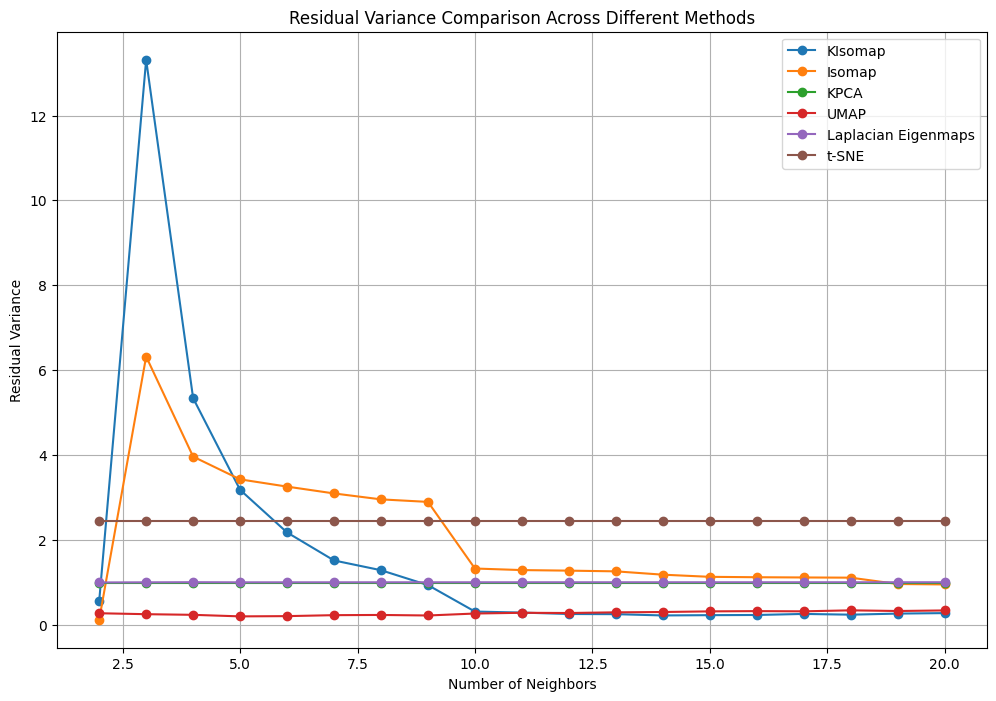

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE, Isomap, SpectralEmbedding
import umap.umap_ as umap
from sklearn.metrics import pairwise_distances

# Função para calcular a variância residual
def compute_residual_variance(X, X_transformed):
    distances_original = pairwise_distances(X)
    distances_transformed = pairwise_distances(X_transformed)
    residual_variance = np.sum((distances_original - distances_transformed) ** 2) / np.sum(distances_original ** 2)
    
    return residual_variance

# Função para comparar métodos de redução de dimensionalidade
def compare_dimensionality_reduction_methods(X, max_neighbors=20):
    methods = {
        'KIsomap': KIsomap,
        'Isomap': Isomap,
        'KPCA': KernelPCA,
        'UMAP': umap.UMAP,
        'Laplacian Eigenmaps': SpectralEmbedding,
        't-SNE': TSNE,
    }
    
    results = {method: [] for method in methods.keys()}
    neighbors_range = range(2, max_neighbors + 1)
    
    for n_neighbors in neighbors_range:
        for name, model in methods.items():
            if name == 'KPCA':
                model_instance = model(n_components=2, kernel='rbf')
                X_transformed = model_instance.fit_transform(X)
                residual_variance = compute_residual_variance(X, X_transformed)
                results[name].append(residual_variance)
            elif name == 't-SNE':
                model_instance = model(n_components=2)
                X_transformed = model_instance.fit_transform(X)
                residual_variance = compute_residual_variance(X, X_transformed)
                results[name].append(residual_variance)
            elif name == 'KIsomap':
                X_transformed = KIsomap(X,n_neighbors,2,0)
                residual_variance = compute_residual_variance(X, X_transformed)
                results[name].append(residual_variance)
            else:
                model_instance = model(n_neighbors=n_neighbors, n_components=2)
                X_transformed = model_instance.fit_transform(X)
                residual_variance = compute_residual_variance(X, X_transformed)
                results[name].append(residual_variance) 
    return neighbors_range, results

# Comparar métodos
max_neighbors = 20
neighbors_range, results = compare_dimensionality_reduction_methods(X, max_neighbors=max_neighbors)

# Plotar os resultados
plt.figure(figsize=(12, 8))
for method, residual_variances in results.items():
    plt.plot(neighbors_range, residual_variances, marker='o', label=method)

plt.xlabel('Number of Neighbors')
plt.ylabel('Residual Variance')
plt.title('Residual Variance Comparison Across Different Methods')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
#######################################
######## TORUS LINK ################

# Parameters
u = np.linspace(0, 2*np.pi, 26)
v = np.linspace(0, 2*np.pi, 26)
U, V = np.meshgrid(u, v)

R = 5
r = 1

# S-Surface equation
x = (R+r*np.cos(V))*np.cos(U)
y = (R+r*np.cos(V))*np.sin(U)-5
z = r*np.sin(V)


x_1 = r*np.sin(V) 
y_1 = (R+r*np.cos(V))*np.sin(U) 
z_1 = (R+r*np.cos(V))*np.cos(U)

# Add Gaussian noise with 0.3 standard deviation
np.random.seed(127)
noise_matrix_1 = np.random.normal(0, 0.2, (len(z.flatten()), 3))
data_matrix_1 = np.column_stack((x.flatten(), y.flatten(), z.flatten())) + noise_matrix_1

noise_matrix_2 = np.random.normal(0, 0.2, (len(z_1.flatten()), 3))
data_matrix_2 = np.column_stack((x_1.flatten(), y_1.flatten(), z_1.flatten())) + noise_matrix_2

result_matrix = np.vstack([np.column_stack((data_matrix_1, np.full(len(z.flatten()), 0.2))), 
                          np.column_stack((data_matrix_2, np.full(len(z_1.flatten()), 0.8)))]).astype('float64')

NameError: name 'np' is not defined

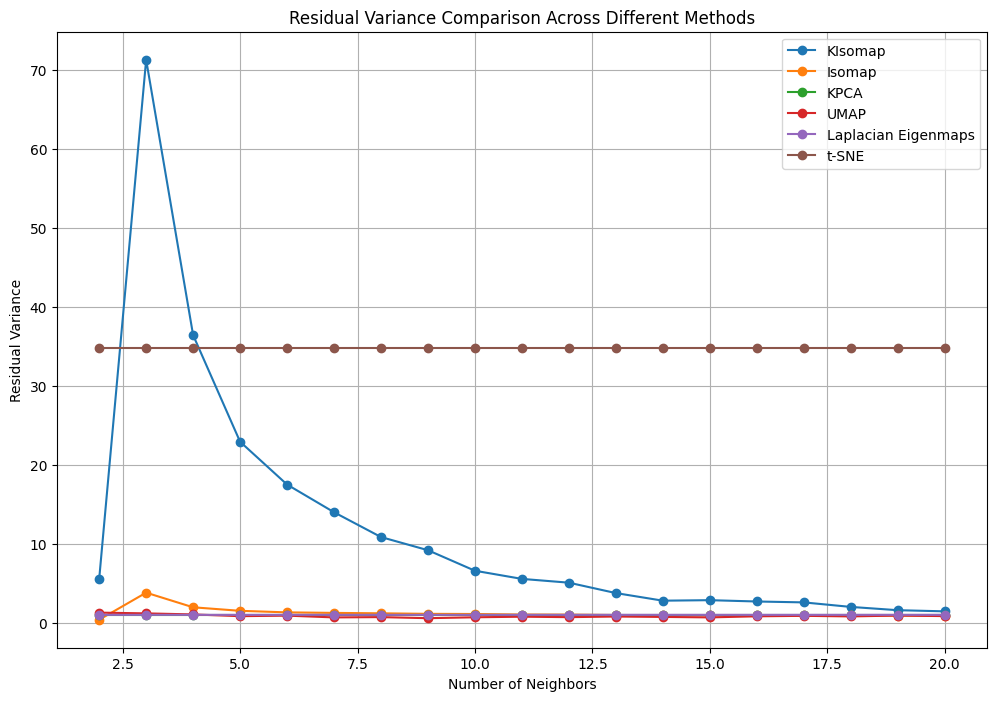

In [29]:
# Comparar métodos
max_neighbors = 20
neighbors_range, results = compare_dimensionality_reduction_methods(result_matrix[:,:3], max_neighbors=max_neighbors)

# Plotar os resultados
plt.figure(figsize=(12, 8))
for method, residual_variances in results.items():
    plt.plot(neighbors_range, residual_variances, marker='o', label=method)

plt.xlabel('Number of Neighbors')
plt.ylabel('Residual Variance')
plt.title('Residual Variance Comparison Across Different Methods')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
from matplotlib import cm

NameError: name 'cm' is not defined

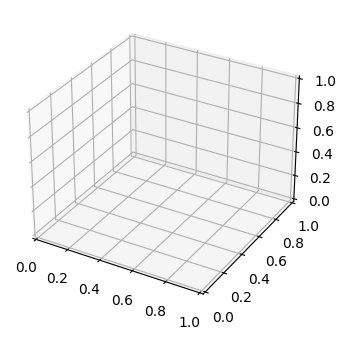

In [10]:
# Função para criar os gráficos de embedding
def create_embedding_plots(result_matrix, nn):
    # Aplicar métodos de redução de dimensionalidade
    dados_kisomap = KIsomap(result_matrix[:,:3], k=nn, d=2, option=0)

    isomap = Isomap(n_neighbors=nn, n_components=2)
    dados_isomap = isomap.fit_transform(result_matrix[:,:3])

    umap_reducer = umap.UMAP(n_neighbors=nn)
    dados_umap = umap_reducer.fit_transform(result_matrix[:,:3])

    kpca = KernelPCA(n_components=2, kernel='rbf')
    dados_kpca = kpca.fit_transform(result_matrix[:,:3])

    tsne = TSNE(n_components=2)
    dados_tsne = tsne.fit_transform(result_matrix[:,:3])

    laplacian = SpectralEmbedding(n_neighbors=nn, n_components=2)
    dados_laplacian = laplacian.fit_transform(result_matrix[:,:3])

    # Criar os plots
    fig = plt.figure(figsize=(18, 12))

    # Torus link
    ax1 = fig.add_subplot(241, projection='3d')
    ax1.scatter(result_matrix[:,:3].T[0], result_matrix[:,:3].T[1], result_matrix[:,:3].T[2], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax1.view_init(elev=30, azim=30)
    ax1.set_title('Torus Link', pad=16)
    ax1.axis('off')
    ax1.set_xlim3d(-10, 5)
    ax1.set_ylim3d(-10, 5)
    ax1.set_zlim3d(-7, 5)
    ax1.set_xlim(-10, 5)
    ax1.set_ylim(-10, 5)
    ax1.scatter(result_matrix.T[0], result_matrix.T[1], -7*np.ones_like(result_matrix.T[2]), c='gray', alpha=0.02)

    # ISOMAP
    ax2 = fig.add_subplot(242)
    ax2.scatter(dados_isomap.T[0], dados_isomap.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax2.set_title('ISOMAP')
    ax2.axis('off')

    # UMAP
    ax3 = fig.add_subplot(243)
    ax3.scatter(dados_umap.T[0], dados_umap.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax3.set_title('UMAP')
    ax3.axis('off')

    # K-ISOMAP
    ax4 = fig.add_subplot(244)
    ax4.scatter(dados_kisomap.T[0], dados_kisomap.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax4.set_title('K-ISOMAP')
    ax4.axis('off')

    # KPCA
    ax5 = fig.add_subplot(245)
    ax5.scatter(dados_kpca.T[0], dados_kpca.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax5.set_title('KPCA')
    ax5.axis('off')

    # t-SNE
    ax6 = fig.add_subplot(246)
    ax6.scatter(dados_tsne.T[0], dados_tsne.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax6.set_title('t-SNE')
    ax6.axis('off')

    # Laplacian Eigenmaps
    ax7 = fig.add_subplot(247)
    ax7.scatter(dados_laplacian.T[0], dados_laplacian.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax7.set_title('Laplacian Eigenmaps')
    ax7.axis('off')

    plt.savefig('linked_torus_updated.tiff', format='tiff', dpi=300)
    plt.savefig('linked_torus_updated.jpeg', format='jpeg', dpi=300)
    plt.close()

create_embedding_plots(result_matrix,20)

In [11]:
type(result_matrix)

numpy.ndarray

In [13]:
type(df.iloc[:, :-1].values)

numpy.ndarray

In [17]:
type(df.iloc[:,-1].values.astype(float))

numpy.ndarray

In [4]:
import pandas as pd

In [5]:
import arff

data = arff.load(open('/Users/user/Mestrado/K-ISOMAP/datasets/blood-transfusion-service-center.arff', 'r'))

# Extrair os dados e os nomes dos atributos
data_entries = data['data']
attribute_names = [attribute[0] for attribute in data['attributes']]

# Converter para um DataFrame do pandas
df = pd.DataFrame(data_entries, columns=attribute_names)

In [ ]:
blood_transfusion = {'data': df.iloc[:, :-1].values, 'target': df.iloc[:, -1].values, 'details': {'name':'blood-transfusion'}}

In [89]:
# Função para criar os gráficos de embedding
def create_embedding_plots(result_matrix, nn):
    # Aplicar métodos de redução de dimensionalidade
    dados_kisomap = KIsomap(result_matrix[:,:3], k=nn, d=2, option=0)

    isomap = Isomap(n_neighbors=nn, n_components=2)
    dados_isomap = isomap.fit_transform(result_matrix[:,:3])

    umap_reducer = umap.UMAP(n_neighbors=nn)
    dados_umap = umap_reducer.fit_transform(result_matrix[:,:3])

    kpca = KernelPCA(n_components=2, kernel='rbf')
    dados_kpca = kpca.fit_transform(result_matrix[:,:3])

    tsne = TSNE(n_components=2)
    dados_tsne = tsne.fit_transform(result_matrix[:,:3])

    laplacian = SpectralEmbedding(n_neighbors=nn, n_components=2)
    dados_laplacian = laplacian.fit_transform(result_matrix[:,:3])

    # Criar os plots
    fig = plt.figure(figsize=(18, 12))

    # Torus link
    ax1 = fig.add_subplot(241, projection='3d')
    ax1.scatter(result_matrix[:,:3].T[0], result_matrix[:,:3].T[1], result_matrix[:,:3].T[2], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax1.view_init(elev=30, azim=30)
    ax1.set_title('Torus Link', pad=16)
    ax1.axis('off')
    ax1.set_xlim3d(-10, 5)
    ax1.set_ylim3d(-10, 5)
    ax1.set_zlim3d(-7, 5)
    ax1.set_xlim(-10, 5)
    ax1.set_ylim(-10, 5)
    ax1.scatter(result_matrix.T[0], result_matrix.T[1], -7*np.ones_like(result_matrix.T[2]), c='gray', alpha=0.02)

    # ISOMAP
    ax2 = fig.add_subplot(242)
    ax2.scatter(dados_isomap.T[0], dados_isomap.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax2.set_title('ISOMAP')
    ax2.axis('off')

    # UMAP
    ax3 = fig.add_subplot(243)
    ax3.scatter(dados_umap.T[0], dados_umap.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax3.set_title('UMAP')
    ax3.axis('off')

    # K-ISOMAP
    ax4 = fig.add_subplot(244)
    ax4.scatter(dados_kisomap.T[0], dados_kisomap.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax4.set_title('K-ISOMAP')
    ax4.axis('off')

    # KPCA
    ax5 = fig.add_subplot(245)
    ax5.scatter(dados_kpca.T[0], dados_kpca.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax5.set_title('KPCA')
    ax5.axis('off')

    # t-SNE
    ax6 = fig.add_subplot(246)
    ax6.scatter(dados_tsne.T[0], dados_tsne.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax6.set_title('t-SNE')
    ax6.axis('off')

    # Laplacian Eigenmaps
    ax7 = fig.add_subplot(247)
    ax7.scatter(dados_laplacian.T[0], dados_laplacian.T[1], c=[cm.rainbow(valor) for valor in result_matrix.T[3]], alpha=0.5)
    ax7.set_title('Laplacian Eigenmaps')
    ax7.axis('off')

    plt.savefig('linked_torus_updated.tiff', format='tiff', dpi=300)
    plt.savefig('linked_torus_updated.jpeg', format='jpeg', dpi=300)
    plt.close()

create_embedding_plots(result_matrix,20)

In [3]:
df = df.values
df[:, -1] = df[:, -1].astype(float)

In [4]:
df = df.astype(float)

In [5]:
df[:,:4]

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01],
       [1.00e+00, 1.60e+01, 4.00e+03, 3.50e+01],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01]])

In [8]:
# Função para criar os gráficos de embedding
def create_embedding_plots(result_matrix,target, nn):
    # Aplicar métodos de redução de dimensionalidade
    dados_kisomap = KIsomap(result_matrix, k=nn, d=2, option=0)

    isomap = Isomap(n_neighbors=nn, n_components=2)
    dados_isomap = isomap.fit_transform(result_matrix)

    umap_reducer = umap.UMAP(n_neighbors=nn)
    dados_umap = umap_reducer.fit_transform(result_matrix)

    kpca = KernelPCA(n_components=2, kernel='rbf')
    dados_kpca = kpca.fit_transform(result_matrix)

    tsne = TSNE(n_components=2)
    dados_tsne = tsne.fit_transform(result_matrix)

    laplacian = SpectralEmbedding(n_neighbors=nn, n_components=2)
    dados_laplacian = laplacian.fit_transform(result_matrix)

    # Criar os plots
    fig = plt.figure(figsize=(18, 12))

    # Torus link
    ax1 = fig.add_subplot(241, projection='3d')
    ax1.scatter(result_matrix.T[0], result_matrix.T[1], result_matrix.T[2], c=[cm.rainbow(valor) for valor in target.T], alpha=0.5)
    ax1.view_init(elev=30, azim=30)
    ax1.set_title('Torus Link', pad=16)
    ax1.axis('off')
    #ax1.set_xlim3d(-10, 5)
    #ax1.set_ylim3d(-10, 5)
    #ax1.set_zlim3d(-7, 5)
    #ax1.set_xlim(-10, 5)
    #ax1.set_ylim(-10, 5)
    ax1.scatter(result_matrix.T[0], result_matrix.T[1], -7*np.ones_like(result_matrix.T[2]), c='gray', alpha=0.02)

    # ISOMAP
    ax2 = fig.add_subplot(242)
    ax2.scatter(dados_isomap.T[0], dados_isomap.T[1], c=[cm.rainbow(valor) for valor in target.values], alpha=0.5)
    ax2.set_title('ISOMAP')
    ax2.axis('off')

    # UMAP
    ax3 = fig.add_subplot(243)
    ax3.scatter(dados_umap.T[0], dados_umap.T[1], c=[cm.rainbow(valor) for valor in target.values], alpha=0.5)
    ax3.set_title('UMAP')
    ax3.axis('off')

    # K-ISOMAP
    ax4 = fig.add_subplot(244)
    ax4.scatter(dados_kisomap.T[0], dados_kisomap.T[1], c=[cm.rainbow(valor) for valor in target.values], alpha=0.5)
    ax4.set_title('K-ISOMAP')
    ax4.axis('off')

    # KPCA
    ax5 = fig.add_subplot(245)
    ax5.scatter(dados_kpca.T[0], dados_kpca.T[1], c=[cm.rainbow(valor) for valor in target.T], alpha=0.5)
    ax5.set_title('KPCA')
    ax5.axis('off')

    # t-SNE
    ax6 = fig.add_subplot(246)
    ax6.scatter(dados_tsne.T[0], dados_tsne.T[1], c=[cm.rainbow(valor) for valor in target.T], alpha=0.5)
    ax6.set_title('t-SNE')
    ax6.axis('off')

    # Laplacian Eigenmaps
    ax7 = fig.add_subplot(247)
    ax7.scatter(dados_laplacian.T[0], dados_laplacian.T[1], c=[cm.rainbow(valor) for valor in target.T], alpha=0.5)
    ax7.set_title('Laplacian Eigenmaps')
    ax7.axis('off')

    plt.savefig('linked_torus_updated.tiff', format='tiff', dpi=300)
    plt.savefig('linked_torus_updated.jpeg', format='jpeg', dpi=300)
    plt.close()

create_embedding_plots(df.iloc[:, :-1].values,df.iloc[:, -1].values,20)

LinAlgError: Array must not contain infs or NaNs

In [7]:
df

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01, 2.00e+00],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01, 2.00e+00],
       [1.00e+00, 1.60e+01, 4.00e+03, 3.50e+01, 2.00e+00],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01, 1.00e+00],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01, 1.00e+00],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01, 1.00e+00]])

In [117]:
df[:,4]

array([2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
       2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1.,
       1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1.,
       2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       2., 2., 1., 2., 2.

In [103]:
import sklearn.neighbors as sknn

In [109]:
knnGraph = sknn.kneighbors_graph(df[:,:4], n_neighbors=20, mode='distance')
A = knnGraph.toarray()

In [110]:
len(A.nonzero()[0])

11984

In [111]:
n = df[:,:4].shape[0]
m = df[:,:4].shape[1]
# Matrix to store the principal components for each neighborhood
matriz_pcs = np.zeros((n, m, m))

In [112]:
for i in range(n):       
    vizinhos = A[i, :]
    indices = vizinhos.nonzero()[0]
    if len(indices) == 0:                   # Treat isolated points
        matriz_pcs[i, :, :] = np.eye(m)     # Eigenvectors in columns
    else:
        # Get the neighboring samples
        amostras = df[:,:4][indices]
        v, w = np.linalg.eig(np.cov(amostras.T))
        # Sort the eigenvalues
        ordem = v.argsort()
        # Select the d eigenvectors associated to the d largest eigenvalues
        maiores_autovetores = w[:, ordem[::-1]]                 
        # Projection matrix
        Wpca = maiores_autovetores  # Autovetores nas colunas
        #print(Wpca.shape)
        matriz_pcs[i, :, :] = Wpca

In [113]:
matriz_pcs

array([[[-2.37402511e-04,  1.20925090e-01, -9.92661607e-01,
         -1.95735954e-14],
        [ 3.99988395e-03, -2.56079880e-05, -4.07614306e-06,
          9.99992000e-01],
        [ 9.99970988e-01, -6.40199702e-03, -1.01903577e-03,
         -3.99996800e-03],
        [ 6.47829547e-03,  9.92640991e-01,  1.20921029e-01,
          3.38268730e-14]],

       [[-5.66963212e-03,  2.07542249e-01, -9.78209625e-01,
          3.00893280e-16],
        [ 3.99988139e-03, -8.36505908e-06, -2.49577990e-05,
          9.99992000e-01],
        [ 9.99970348e-01, -2.09126477e-03, -6.23944974e-03,
         -3.99996800e-03],
        [ 3.34067148e-03,  9.78223820e-01,  2.07525898e-01,
         -3.11154274e-16]],

       [[-4.19835593e-03,  8.65698177e-02, -9.96236940e-01,
         -1.06939520e-16],
        [ 3.99878836e-03, -9.38628445e-05, -2.50081333e-05,
          9.99992000e-01],
        [ 9.99697090e-01, -2.34657111e-02, -6.25203332e-03,
         -3.99996800e-03],
        [ 2.39188370e-02,  9.95969386e-